<a href="https://colab.research.google.com/github/Adigozalovh/Machine-Learning/blob/main/Regression_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/housing.csv

--2025-10-16 15:31:41--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2025-10-16 15:31:41 (31.9 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/housing.csv")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

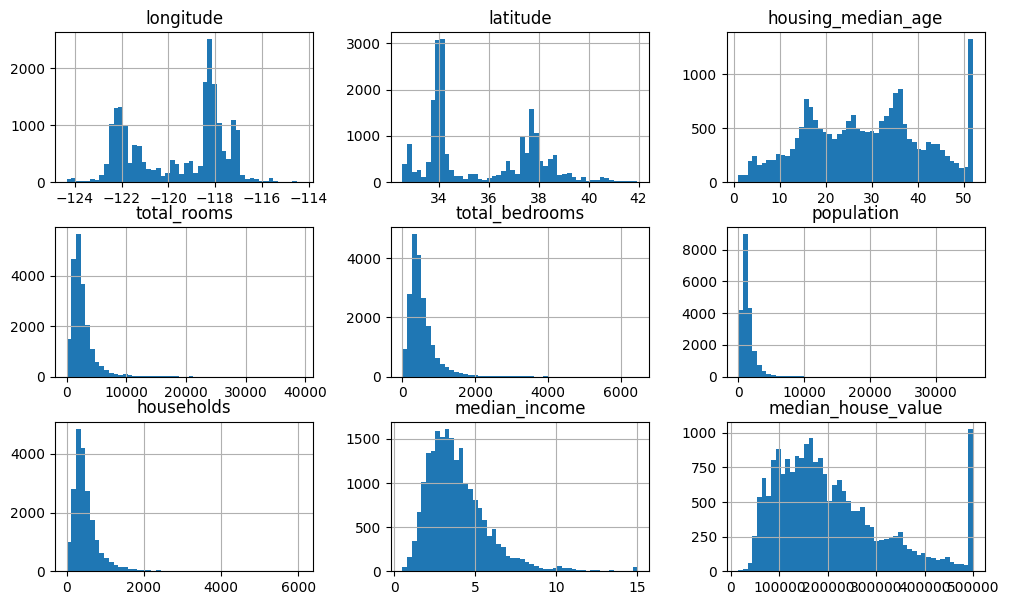

In [ ]:
df.hist(figsize=(12,7),bins=50)

In [ ]:
p_law = ['total_rooms','total_bedrooms','population','households']

In [ ]:
for column in p_law:
  df[column] = np.log(df[column])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

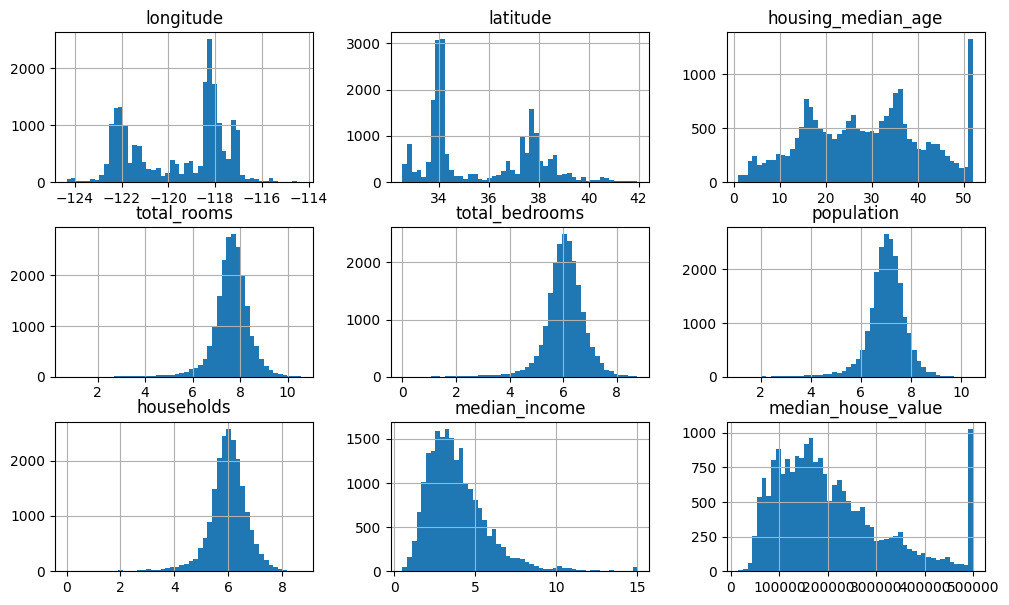

In [ ]:
df.hist(figsize=(12,7),bins=50)

In [ ]:
import matplotlib.pyplot as plt

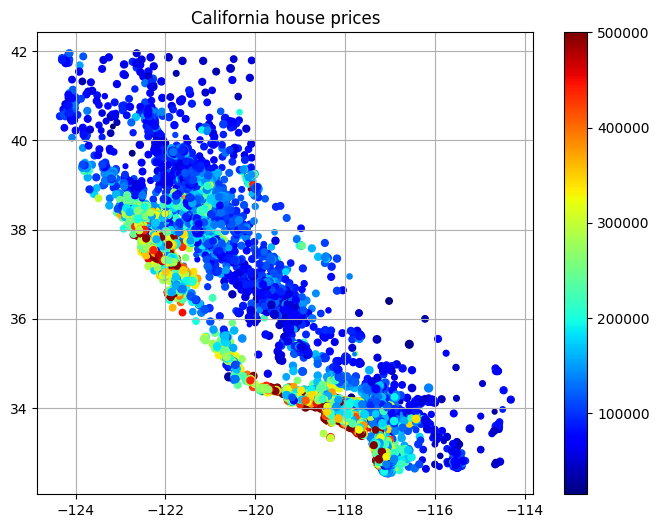

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['longitude'],
            y=df['latitude'],
            c=df['median_house_value'],
            cmap='jet',
            s = df['population'] * 3.5)
plt.title('California house prices')
plt.colorbar()
plt.grid()

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,7.628577,6.051063,7.024116,5.980806,3.870671,206855.816909
std,2.003532,2.135952,12.585558,0.751536,0.732785,0.738524,0.733071,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,0.693147,0.000000,1.098612,0.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,7.277766,5.690359,6.668228,5.634790,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,7.662468,6.075346,7.061334,6.013715,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,8.054523,6.472346,7.452982,6.405228,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,10.579489,8.771060,10.482402,8.713089,15.000100,500001.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,1.8672,84700.0,INLAND


In [ ]:
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value'].copy()

In [ ]:
rfr = RandomForestRegressor()
onehot = OneHotEncoder(sparse_output=False)
ord = OrdinalEncoder()

ordinal encode ve one hot encode

In [ ]:
ord.fit_transform(df[['ocean_proximity']])

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
encoded = onehot.fit_transform(df[['ocean_proximity']])

In [ ]:
columns = onehot.get_feature_names_out()

In [ ]:
encoded_df = pd.DataFrame(encoded, columns = columns)

In [ ]:
X = pd.concat([X, encoded_df], axis = 1).drop(['ocean_proximity'], axis=1)

In [ ]:
rfr.fit(X,y)

RandomForestRegressor()

In [ ]:
rfr.score(X,y)

0.9761771175422089

In [ ]:
rfr.predict([X.iloc[15]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([140557.])

In [ ]:
y[15]

np.float64(140000.0)